In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def approx_sin(x, double_precision):
    minus_one = np.float64(-1.0) if double_precision else np.float32(-1.0)
    one = np.float64(1.0) if double_precision else np.float32(1.0)
    two = np.float64(2.0) if double_precision else np.float32(2.0)
    
    a = x
    n = 1
    sin = np.float64(0.0) if double_precision else np.float32(0.0)
    
    while one + abs(a) != one:
        if double_precision:
            sin = np.float64(sin + a)
            a = np.float64(a * minus_one * np.power(x, two, dtype=np.float64) / (two * np.float32(n) * two * np.float64(n) + one))
        else:
            sin = np.float32(sin + a)
            a = np.float32(a * minus_one * np.power(x, two, dtype=np.float32) / (two * np.float32(n) * (two * np.float32(n) + one))
        n += 1
        
    return sin

def absolute_error(x, double_precision):
    return abs(approx_sin(x, double_precision) - np.sin(x))


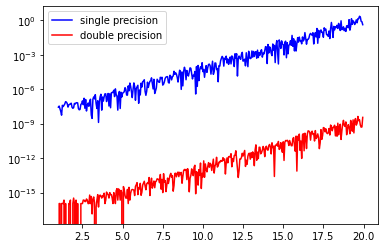

In [2]:
#single precision numbers
start1 = np.float32(1.0)
stop1 = np.float32(20.0)
step1 = np.float32(0.05)

X1 = np.arange(start1, stop1, step1)
Y1 = [absolute_error(x, False) for x in X1]

#double precision numbers
start2 = np.float64(1.0)
stop2 = np.float64(20.0)
step2 = np.float64(0.05)

X2 = np.arange(start2, stop2, step2)
Y2 = [absolute_error(x, True) for x in X2]

#plot graphics
plt.plot(X1, Y1, color='blue', label='single precision')
plt.plot(X2, Y2, color='red', label='double precision')
plt.yscale('log')
plt.legend()

plt.show()

Математика происходящего:

Разложение синуса в ряд Тейлора:

$\sin{x} = \sum\limits_{n=0}^{\infty} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$

Теперь заметим, что:

$\sin{x} = \sum\limits_{n=0}^{\infty} a_n$, где $a_0 = x$ и $a_k = - \frac{x^2}{2k(2k+1)}a_{k-1}$

Для того, чтобы найти подходящее $N$ нужно, чтобы выполнялось: $a_N < \epsilon$

Тогда наш синус мы будем находить таким образом:

$\sin{x} = \sum\limits_{n=0}^{N} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$